In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
plt.ion()

import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors
from sklearn.preprocessing import normalize
import csv
import numpy as np


In [2]:
def load_subSets(ratio_train, ratio_valid, trainCsv, testCsv):
    dataTrain = np.genfromtxt(trainCsv , delimiter = ',') #lecture du fichier trainCsv
    dataTrain = dataTrain[1:] #donnees generales du fichier trainCsv
    y = dataTrain[:,0] #labels
    X = dataTrain[:,1:] #donnees sans leur label
    
    Ntot   = X.shape[0] #nombre d'images dans les donnees X
    Ntrain = int(ratio_train*Ntot) 
    Nvalid = int(ratio_valid*Ntot)
    
    X_train = X[0: Ntrain].copy() #les donnees qu'on utilise pour entrainer les modeles
    y_train = y[0: Ntrain].copy() #les labels associes 
    
    X_valid = X[Ntrain:Ntrain+Nvalid].copy() #les donnees qu'on utilise pour tester les modeles
    y_valid = y[Ntrain:Ntrain+Nvalid].copy() #les labels associes
        
    dataTest = np.genfromtxt(testCsv, delimiter = ',') #lecture du fichier testCsv
    dataTest = dataTest[1:] #donnees generales du fichier testCsv, celles que le modele ne connait pas
    X_test  = dataTest[:,1:] #labels
    y_test  = dataTest[:,0] #donnees sans leur label
    
    return X, y, X_train, y_train, X_valid, y_valid, X_test, y_test

In [3]:
dimRepre = 28
ratio_train = 0.7
ratio_valid = 0.3

X, y, X_train, y_train, X_valid, y_valid, X_test, y_test = load_subSets(ratio_train, ratio_valid, 'sign_mnist_train.csv','sign_mnist_test.csv')

Text(0.5, 1.0, "Ceci est censé ressembler à la 16ème lettre de l'alphabet ;-)")

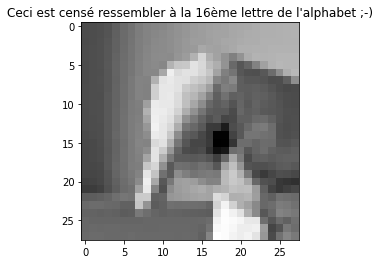

In [4]:
plt.figure()
idx = 15
labelIdx = y[idx] 
plt.imshow(X[idx].reshape(dimRepre, dimRepre), cm.gray)
plt.title("Ceci est censé ressembler à la "+str(int(y[idx]))+ "ème lettre de l'alphabet ;-)")

In [5]:
mask = (labelIdx == y)
X_bis = X[mask]
X_bis

array([[161., 168., 172., ..., 238., 255., 255.],
       [ 87.,  91.,  99., ...,   1.,   2.,   3.],
       [ 86.,  87.,  89., ..., 122., 141., 128.],
       ...,
       [ 59.,  62.,  69., ...,   0.,   0.,   0.],
       [ 81.,  83.,  86., ..., 222., 224., 225.],
       [153., 158., 161., ..., 211., 238., 231.]])

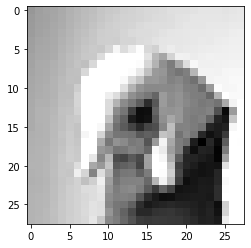

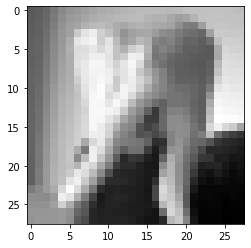

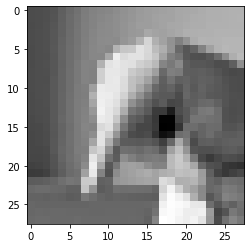

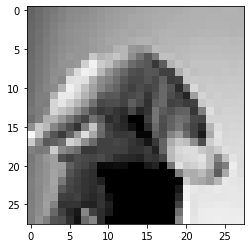

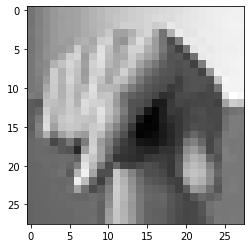

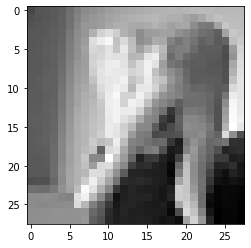

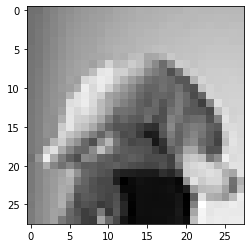

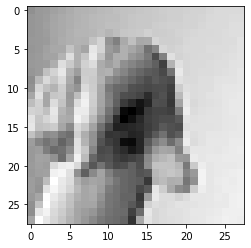

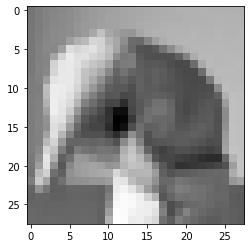

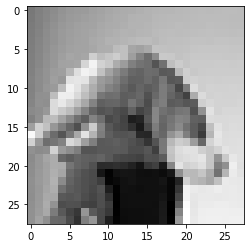

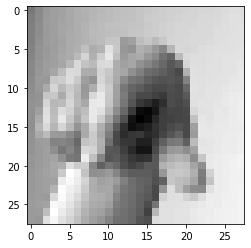

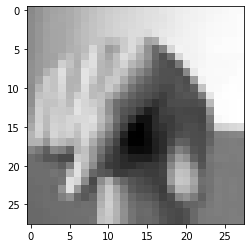

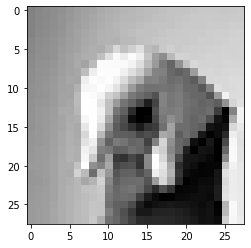

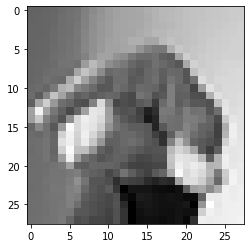

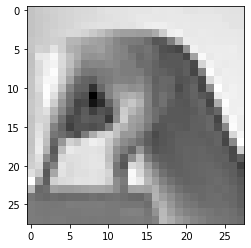

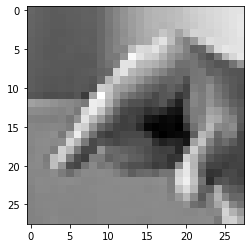

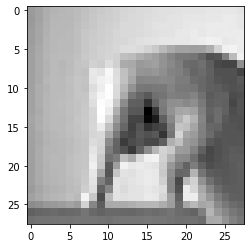

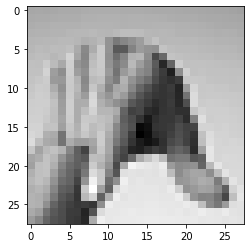

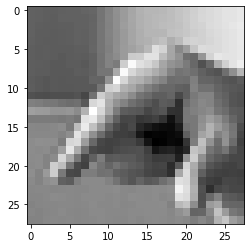

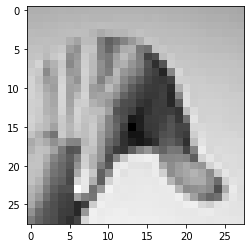

In [6]:
for i in X_bis[:20]:
    plt.figure()
    plt.imshow(i.reshape(dimRepre, dimRepre), cm.gray)

### Choix nombre de composants avec comparaison

In [7]:
training_score = []
valid_score = []

#nComp_range = n_components du PCA 
nComp_range = np.arange(1,50,5)
tabResult = pd.DataFrame(columns =["ScoreTraining", "ScoreValidation"])

for nC in nComp_range:
    
    #compression des images en n_components pixels
    preProc = sklearn.decomposition.PCA(n_components = nC)
    #entrainement
    preProc.fit(X)
    #X_train_transformed = les donnees de X_train entraines, idem pour X_valid_transformed
    X_train_transformed = preProc.transform(X_train)
    X_valid_transformed = preProc.transform(X_valid)
    
    #ici on choisit un classifieur SVC
    clf = sklearn.svm.SVC(kernel = "poly", coef0 = 1, degree = 2)
    #entrainement avec X_train_transformed
    clf.fit(X_train_transformed, y_train)
    
    trainScore = clf.score(X_train_transformed, y_train)
    validScore = clf.score(X_valid_transformed, y_valid)
    tabResult.loc[nC] = np.array([trainScore, validScore])
    
    # print("nombre Composants", nC , "   training score:", trainScore, ". valid score:", validScore)
    
    training_score.append(trainScore)
    valid_score.append(validScore)

nombre Composants 1    training score: 0.06967426371110418 . valid score: 0.06884409907722196
nombre Composants 6    training score: 0.5156623998334894 . valid score: 0.5074065080135989
nombre Composants 11    training score: 0.84264751795192 . valid score: 0.8338999514327343
nombre Composants 16    training score: 0.9524404204391717 . valid score: 0.9503399708596406
nombre Composants 21    training score: 0.9793943178270371 . valid score: 0.9777804759592035
nombre Composants 26    training score: 0.9885523987927984 . valid score: 0.9882224380767363
nombre Composants 31    training score: 0.9923509210115516 . valid score: 0.9913793103448276
nombre Composants 36    training score: 0.9951607867624103 . valid score: 0.9958717824186498
nombre Composants 41    training score: 0.9989072744302216 . valid score: 0.9984215638659544
nombre Composants 46    training score: 0.9993755853886981 . valid score: 0.9992714910150559


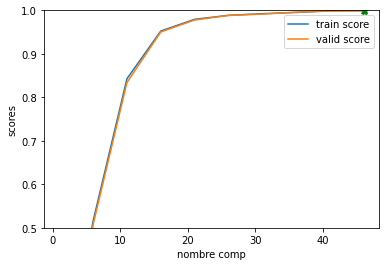

In [8]:
plt.figure()
plt.plot(nComp_range, training_score, label= "train score")
plt.plot(nComp_range, valid_score   , label= "valid score")
plt.xlabel("nombre comp")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,1])
bestIndex = np.argmax(valid_score)
bestNC = nComp_range[bestIndex]
plt.plot(bestNC, valid_score[bestIndex], marker='X', color='green')

### on prepare nos données

In [9]:
nbCompOptimal = 16
#car bon score + plafone un peu après + nombre de composants le plus limités possible

In [10]:
#on prépare nos données en les optimisants

preProc = sklearn.decomposition.PCA(n_components = nbCompOptimal)
preProc.fit(X)

X_train_transformed = preProc.transform(X_train)
X_valid_transformed = preProc.transform(X_valid)

X_train_decompressees = preProc.inverse_transform(X_train_transformed)

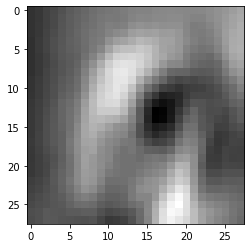

In [11]:
plt.figure()
plt.imshow(X_train_decompressees[idx].reshape(dimRepre, dimRepre), cm.gray)

In [12]:
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

model_dict = dict(Svc=SVC(),
                  NuSvc=NuSVC(),
                  LinearSvc=LinearSVC(),
                  DecisionTree=DecisionTreeClassifier(),
                  GuassianProcess=GaussianProcessClassifier(),
                  RandomForest=RandomForestClassifier(),
                  KNeighbors=KNeighborsClassifier())
                  # RadiusNeighbors=RadiusNeighborsClassifier())

In [13]:
def analyze_model_experiments(tab_result):
    valid_bad = tab_result.score_validation < tab_result.score_validation.median()          # On regarde si le score de validation est mauvais 
    train_bad = tab_result.score_training < tab_result.score_training.median()              # On regarde si le score d'entrainement est mauvais
    overfitted = valid_bad & ~train_bad                                                     # Si c'est le cas seulement pour la validation alors on est en overfitting        
    underfitted = valid_bad & train_bad                                                     # Si c'est le cas pour les deux alors on est en underfitting
    tab_result['Overfitted'] = overfitted
    tab_result['Underfitted'] = underfitted
    return tab_result

def performance(X_train, Y_train, X_valid, Y_valid, model_dict):
    tab_result = pd.DataFrame(columns =["CVScore", "(+/-)", "Score_training", "Score_validation"])    # On créé un tableau panda
    for model_name, model in model_dict.items():                                                      # On itère sur chaque modèle du dictionnaire
        model.fit(X_train, Y_train)                                                                   # On entraine le modèle sur l'ensemble d'entrainement
        CVScore = cross_val_score(model, X_train, Y_train, cv=5)                                      # On calcul la cross validation
        train_score = model.score(X_train, Y_train)                                                   # On calcul le score sur l'ensemble d'entrainement
        valid_score = model.score(X_valid, Y_valid)                                                   # On calcul le score sur l'ensemble de validation
        tab_result.loc[model_name] = np.array([CVScore.mean(), CVScore.std() * 2, train_score, valid_score]) # On ajoute les scores dans le tableau
    return tab_result


In [14]:
compar_results = performance(X_train_transformed, y_train, X_valid_transformed, y_valid, model_dict) # appel de la fonction "performance" avec nos données transformées
compar_results.round(6).style.background_gradient(cmap='Blues')
best_model = compar_results.score_validation.idxmax()                                                # On cherche ici le meilleur modèle
print("Le meilleur modèle est : {}".format(best_model))

analyze_model_experiments(compar_results)                                                            # On affiche le tableau des résultats

/home/antonin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/antonin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/antonin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/antonin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/antonin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, inc

In [ ]:
svc = SVC(kernel='poly')                                                # On initialise notre meilleur modèle
distributions = dict(degree=[2, 3],                                     # On créé un dictionnaire d'hyper-paramètres de ce modèle
                     coef0=[0.0, 2.0, 3.0],
                     gamma=['scale', 'auto'])
clf = RandomizedSearchCV(svc, distributions)                            # On apelle RandomeSearchCV qui va nous renvoyer le modèle avec les hyper-paramètres les plus optimisé
search = clf.fit(X_train_transformed, y_train)                          # On entraine notre modèle avec l'ensemble d'entrainement
print("Score final : ", search.score(X_valid_transformed, y_valid))     # On affiche le score obtenu avec l'ensemble de validation
print("Meilleurs parametres : ", search.best_params_)                   # On affiche les meilleurs hyper-paramètres
print("Meilleure configuration : ", search.best_estimator_)             # On affiche la configuration du modèle optimale

In [ ]:
X_test_transformed = preProc.transform(X_test)
svc = SVC()
svc.fit(X_train_transformed, y_train)
print("Score de l'ensemble test : ", svc.score(X_test_transformed, y_test))


### comparaison pour une autre svm : LinearSVC

In [15]:
clfLinearSVC = sklearn.svm.LinearSVC()
clfLinearSVC.fit(normalize(X_train_transformed), y_train)

trainscore = clfLinearSVC.score(X_train_transformed, y_train)
validscore = clfLinearSVC.score(X_valid_transformed, y_valid)
print("nombre Composants", str(nbCompOptimal) , "   training score:",trainscore, ". valid score:", validscore)

nombre Composants 16    training score: 0.36538661671349776 . valid score: 0.3674113647401651


##### on teste le modele LinearSVC sans PCA

In [16]:
clfLinearSVC2 = sklearn.svm.LinearSVC()
clfLinearSVC2.fit(normalize(X_train), y_train)

trainscore = clfLinearSVC2.score(X_train, y_train)
validscore = clfLinearSVC2.score(X_valid, y_valid)
print("training score:",trainscore, ". valid score:", validscore)

training score: 0.2780726402331148 . valid score: 0.26748421563865954


##### on teste le modele LinearSVC avec PCA avec beaucoup de composants

In [17]:
#compression des images en n_components pixels
preProc3 = sklearn.decomposition.PCA(n_components = 700)
#entrainement
preProc3.fit(X)
#X_train_transformed = les donnees de X_train entraines, idem pour X_valid_transformed
X_train_transformed3 = preProc.transform(X_train)
X_valid_transformed3 = preProc.transform(X_valid)

In [18]:
clfLinearSVC3 = sklearn.svm.LinearSVC()
clfLinearSVC3.fit(normalize(X_train_transformed3), y_train)

trainscore = clfLinearSVC3.score(X_train_transformed3, y_train)
validscore = clfLinearSVC3.score(X_valid_transformed3, y_valid)
print("nombre Composants", str(700) , "   training score:",trainscore, ". valid score:", validscore)

nombre Composants 700    training score: 0.36538661671349776 . valid score: 0.3674113647401651


### comparaison pour une autre svm : NuSVC

In [19]:
clfNuSVC = sklearn.svm.NuSVC(nu=0.7, kernel='poly', coef0=1, degree=2)
clfNuSVC.fit(X_train_transformed, y_train)

trainscore = clfNuSVC.score(X_train_transformed, y_train)
validscore = clfNuSVC.score(X_valid_transformed, y_valid)
print("nombre Composants", str(nbCompOptimal) , "   training score:",trainscore, ". valid score:", validscore)

nombre Composants 16    training score: 0.6126548027890519 . valid score: 0.6008984944147644


##### on teste le modele NuSVC sans PCA

In [ ]:
clfNuSVC2 = sklearn.svm.NuSVC(nu=0.7, kernel='poly', coef0=1, degree=2)
clfNuSVC2.fit(X_train, y_train)

trainscore = clfNuSVC2.score(X_train, y_train)
validscore = clfNuSVC2.score(X_valid, y_valid)
print("training score:",trainscore, ". valid score:", validscore)

### cross-validation

In [ ]:
num_folds = 10
kfold = sklearn.model_selection.KFold(n_splits=num_folds)
kfold

In [ ]:
monScoring = sklearn.model_selection.cross_val_score(estimator = clf, X = X, y = y, cv= kfold, scoring= 'neg_mean_squared_error')